# Analisis exploratorio de Datos(EDA)

Para conseguir los datos lo sacamos de la base de datos de ucirepo, por lo que primero instalamos la libreria para extraerlos

In [ ]:
import tensorflow as tf
!pip3 install -U ucimlrepo 

In [ ]:
from ucimlrepo import fetch_ucirepo

In [ ]:
covertype = fetch_ucirepo(id=31)

Luego empezamos importamos las librerias a usr en el EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [ ]:
# Load data into DataFrame
df = covertype.data.features
df.insert(0, "Covertype", covertype.data.targets)
df.head()



,Covertype,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,5,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,5,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,2,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,2,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Escalado de datos para PCA u otros análisis posteriores
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])

df_scaled.info()
df_scaled.head()
df_scaled.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Covertype                           581012 non-null  float64
 1   Elevation                           581012 non-null  float64
 2   Aspect                              581012 non-null  float64
 3   Slope                               581012 non-null  float64
 4   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 5   Vertical_Distance_To_Hydrology      581012 non-null  float64
 6   Horizontal_Distance_To_Roadways     581012 non-null  float64
 7   Hillshade_9am                       581012 non-null  float64
 8   Hillshade_Noon                      581012 non-null  float64
 9   Hillshade_3pm                       581012 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 11  Wilderness_Area1          

,count,mean,std,min,25%,50%,75%,max
Covertype,581012.0,1.064447e-16,1.000001,-0.752931,-0.752931,-0.036857,-0.036857,3.543515
Elevation,581012.0,-3.819486e-16,1.000001,-3.930094,-0.537049,0.130845,0.727307,3.209587
Aspect,581012.0,-3.913408e-17,1.000001,-1.390866,-0.872609,-0.256062,0.932355,1.825901
Slope,581012.0,6.417988e-17,1.000001,-1.883448,-0.681563,-0.147392,0.520322,6.930377
Horizontal_Distance_To_Hydrology,581012.0,-7.122402e-17,1.000001,-1.267604,-0.759486,-0.241959,0.539037,5.304993
Vertical_Distance_To_Hydrology,581012.0,8.061620e-17,1.000001,-3.763928,-0.676194,-0.281650,0.387359,9.513327
Horizontal_Distance_To_Roadways,581012.0,2.191508e-17,1.000001,-1.507225,-0.797912,-0.226484,0.627129,3.057138
Hillshade_9am,581012.0,5.060036e-16,1.000001,-7.924808,-0.528432,0.218677,0.704298,1.563473
Hillshade_Noon,581012.0,3.025064e-16,1.000001,-11.296592,-0.521973,0.135633,0.692069,1.552015
Hillshade_3pm,581012.0,-1.385346e-16,1.000001,-3.723844,-0.614724,0.012325,0.665502,2.912429


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Covertype                           581012 non-null  int64
 1   Elevation                           581012 non-null  int64
 2   Aspect                              581012 non-null  int64
 3   Slope                               581012 non-null  int64
 4   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 5   Vertical_Distance_To_Hydrology      581012 non-null  int64
 6   Horizontal_Distance_To_Roadways     581012 non-null  int64
 7   Hillshade_9am                       581012 non-null  int64
 8   Hillshade_Noon                      581012 non-null  int64
 9   Hillshade_3pm                       581012 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 11  Wilderness_Area1                    581012 non-null 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Covertype,581012.0,2.051471,1.396504,1.0,1.0,2.0,2.0,7.0
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0


In [ ]:
#Frecuencias de los covertypes
df.Covertype.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Covertype, dtype: int64

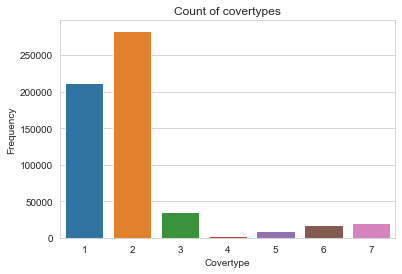

In [ ]:

#Tabla de frecuencias de los covertypes
sns.set_style("whitegrid")
plt.title('Count of covertypes')
sns.countplot(x=df.Covertype)
plt.xlabel('Covertype')
plt.ylabel('Frequency')
plt.show()

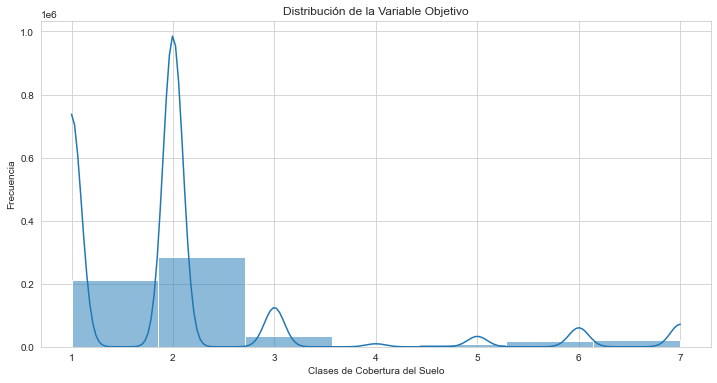

In [ ]:
#Visualizacion de las distribuciones
plt.figure(figsize=(12, 6))
sns.histplot(df['Covertype'], bins=df['Covertype'].nunique(), kde=True)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Clases de Cobertura del Suelo')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#Revisamos por datos faltantes
df.isnull().sum()

Covertype                             0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0


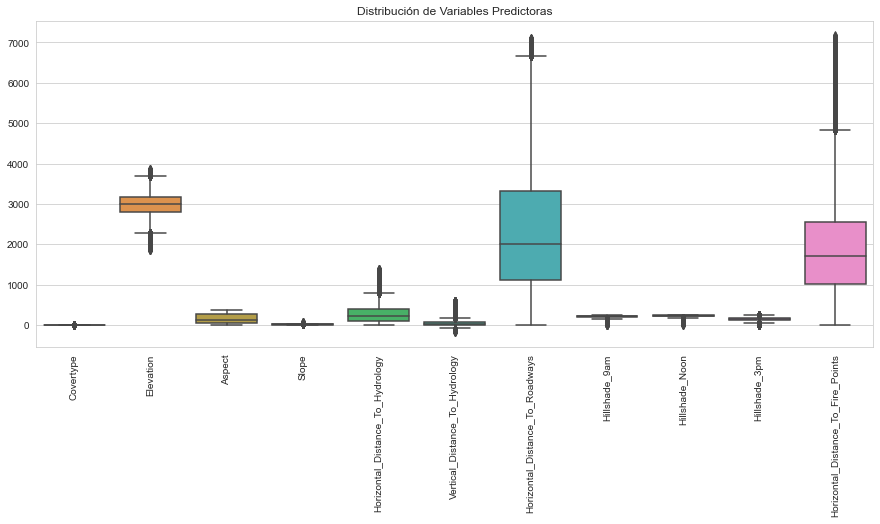

In [ ]:
# Boxplot de algunas variables
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.iloc[:, :11])  # Graficamos solo las primeras 11 variables para claridad
plt.xticks(rotation=90)
plt.title('Distribución de Variables Predictoras')
plt.show()

In [ ]:
cat_cols= df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['Covertype', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']


In [ ]:
from scipy.stats import kurtosis


In [ ]:
num_cols = num_cols[:11]
print(num_cols)

['Covertype', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


Column:  Covertype
Skew: 2.28
Kurtosis:  4.95


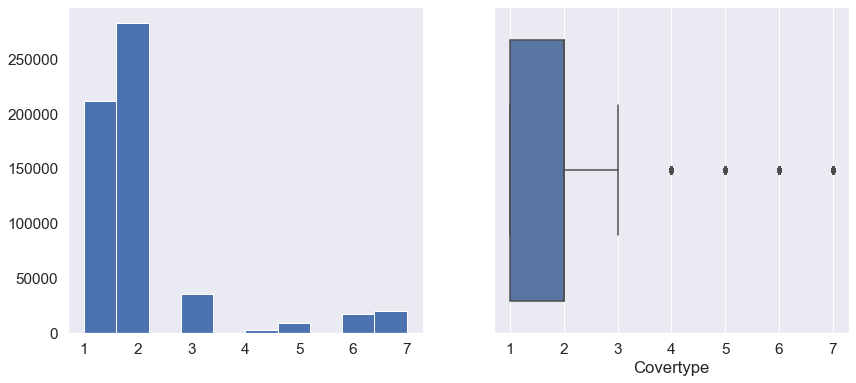

Column:  Elevation
Skew: -0.82
Kurtosis:  0.75


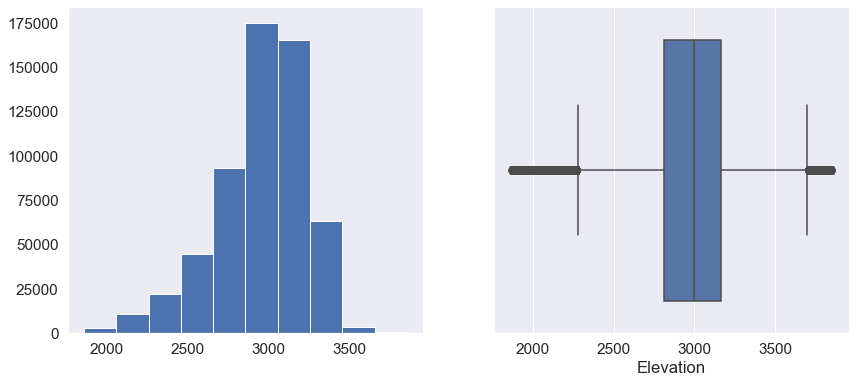

Column:  Aspect
Skew: 0.4
Kurtosis:  -1.22


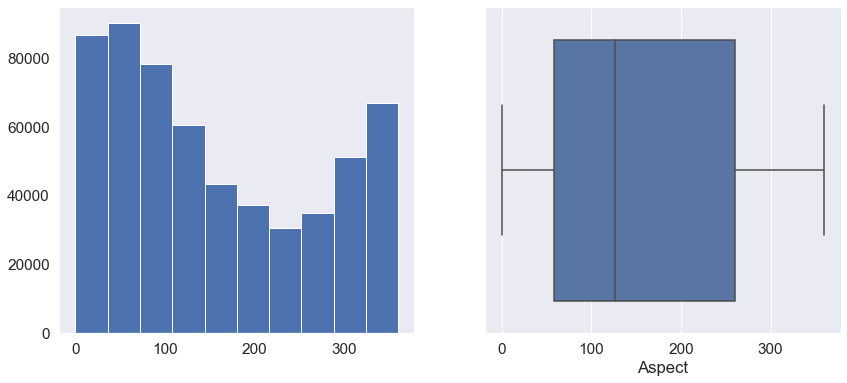

Column:  Slope
Skew: 0.79
Kurtosis:  0.58


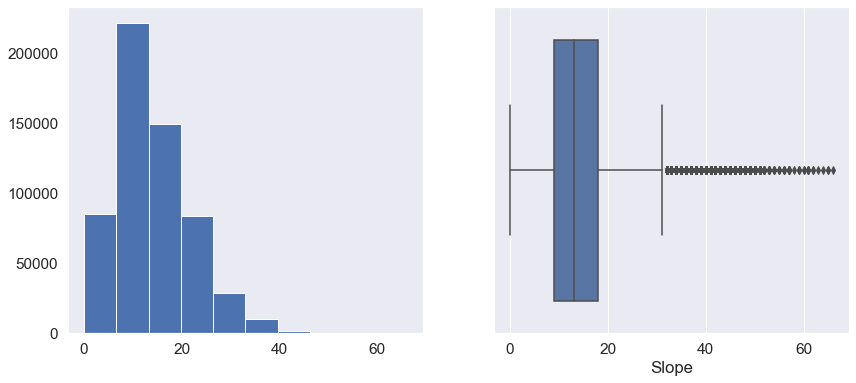

Column:  Horizontal_Distance_To_Hydrology
Skew: 1.14
Kurtosis:  1.37


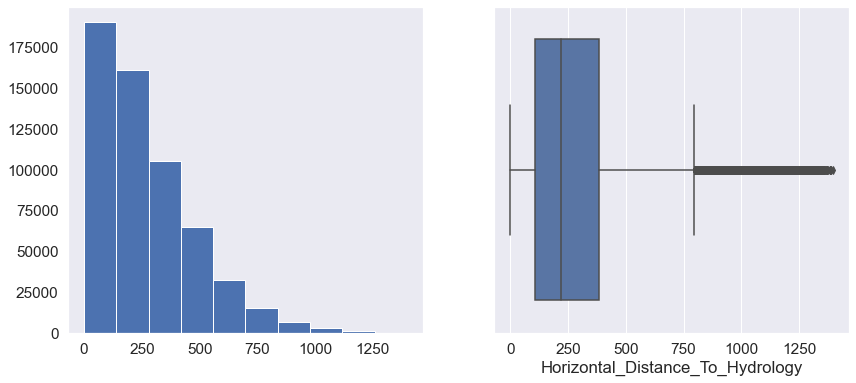

Column:  Vertical_Distance_To_Hydrology
Skew: 1.79
Kurtosis:  5.25


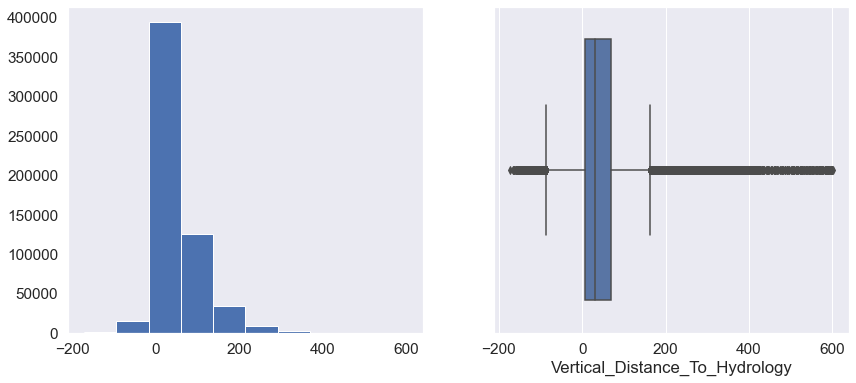

Column:  Horizontal_Distance_To_Roadways
Skew: 0.71
Kurtosis:  -0.38


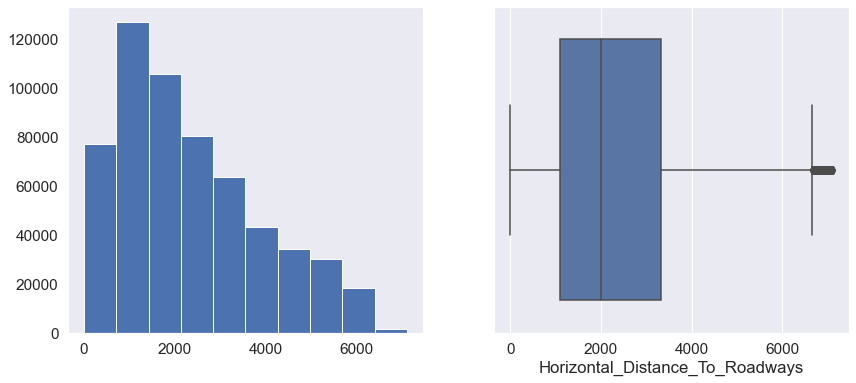

Column:  Hillshade_9am
Skew: -1.18
Kurtosis:  1.88


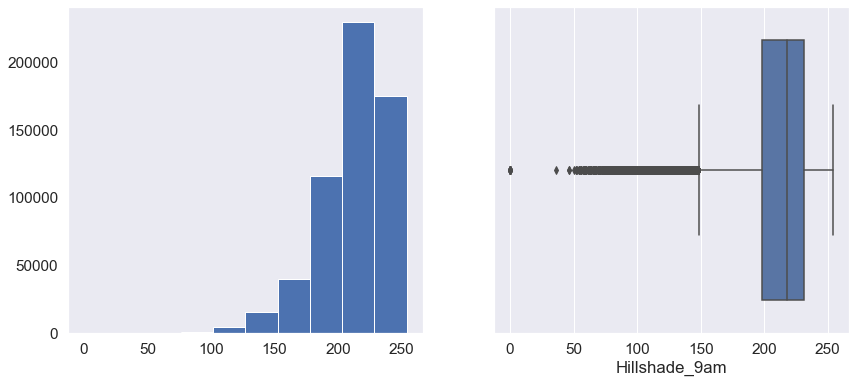

Column:  Hillshade_Noon
Skew: -1.06
Kurtosis:  2.07


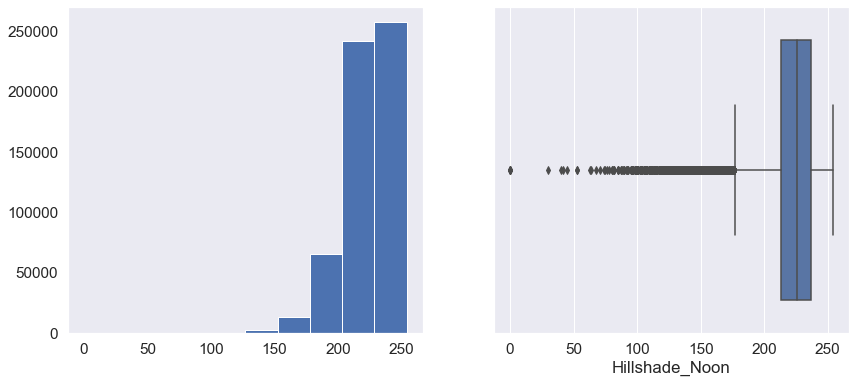

Column:  Hillshade_3pm
Skew: -0.28
Kurtosis:  0.4


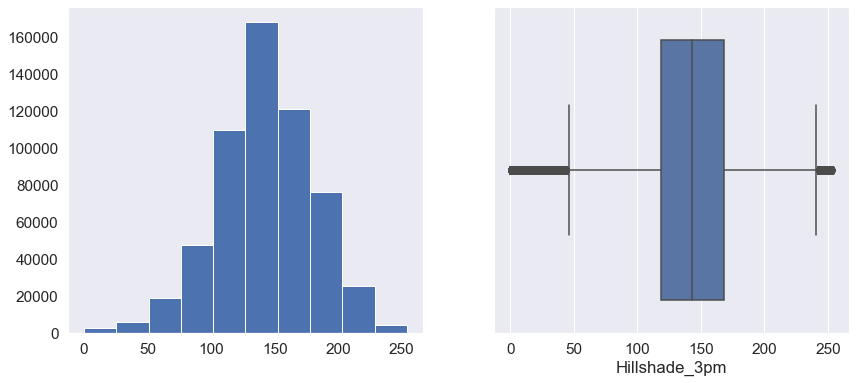

Column:  Horizontal_Distance_To_Fire_Points
Skew: 1.29
Kurtosis:  1.65


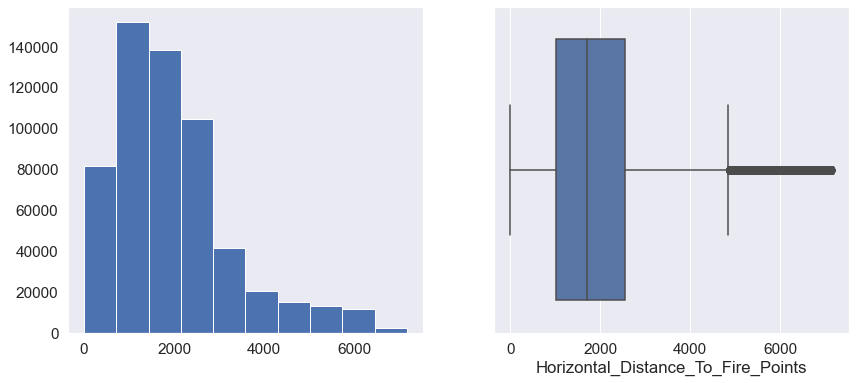

In [ ]:
sns.set(font_scale=1.4)
for col in num_cols:
    print('Column: ', col)
    print('Skew:', round(df[col].skew(), 2))
    print('Kurtosis: ', round(df[col].kurtosis(), 2))
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

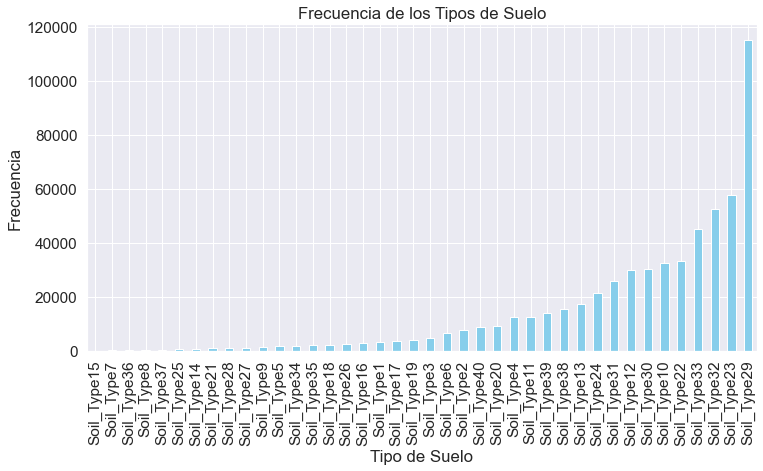

In [ ]:
# Diagrama de barras para la frecuencia de variables dummy del tipo de tierra
soil_cols = [col for col in df.columns if "Soil_Type" in col]
soil_counts = df[soil_cols].sum()
plt.figure(figsize=(12, 6))
soil_counts.sort_values().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de los Tipos de Suelo')
plt.xlabel('Tipo de Suelo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

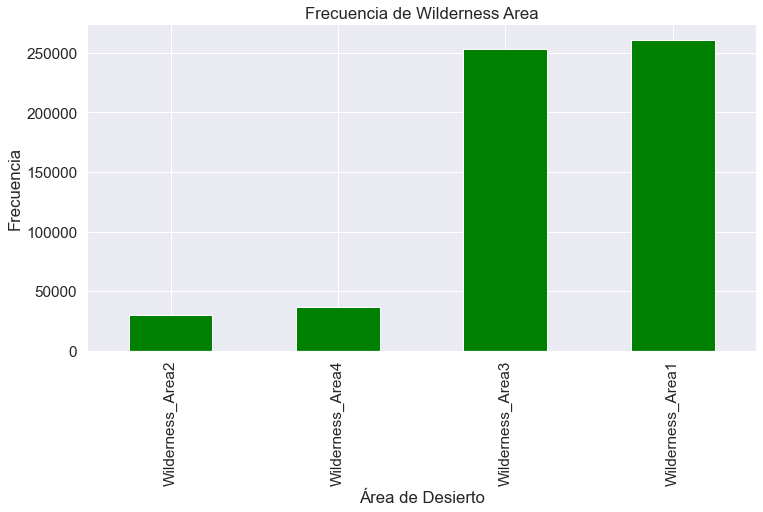

In [ ]:
# Diagrama de barras para la frecuencia de Wilderness Area
wilderness_cols = [col for col in df.columns if "Wilderness_Area" in col]
wilderness_counts = df[wilderness_cols].sum()
plt.figure(figsize=(12, 6))
wilderness_counts.sort_values().plot(kind='bar', color='green')
plt.title('Frecuencia de Wilderness Area')
plt.xlabel('Área de Desierto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

                                    Covertype  Elevation    Aspect     Slope  \
Covertype                            1.000000  -0.491177  0.025320  0.151078   
Elevation                           -0.491177   1.000000  0.044060 -0.160297   
Aspect                               0.025320   0.044060  1.000000  0.072005   
Slope                                0.151078  -0.160297  0.072005  1.000000   
Horizontal_Distance_To_Hydrology    -0.027699   0.287402  0.004692  0.019206   
Vertical_Distance_To_Hydrology       0.095683   0.086931  0.073052  0.301333   
Horizontal_Distance_To_Roadways     -0.221889   0.341590  0.019418 -0.205023   
Hillshade_9am                        0.012894   0.015100 -0.428957 -0.131244   
Hillshade_Noon                      -0.034298   0.150427  0.421134 -0.434180   
Hillshade_3pm                       -0.036393   0.072750  0.640536 -0.173474   
Horizontal_Distance_To_Fire_Points  -0.136924   0.154851 -0.112724 -0.169574   
Wilderness_Area1                    -0.1

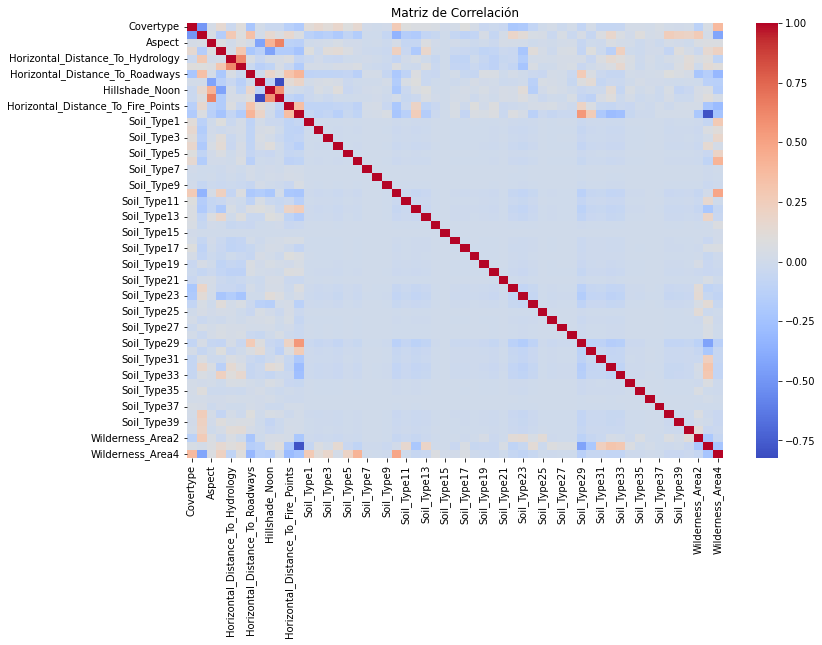

In [ ]:
# Correlación y multicolinealidad
correlation_matrix = df.corr(method = "spearman")
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# Identificación de variables altamente correlacionadas
threshold = 0.8
corr_pairs = correlation_matrix.unstack().sort_values(kind='quicksort', ascending=False)
high_corr = [(i, j, corr_pairs[i, j]) for i, j in corr_pairs.index if i != j and abs(corr_pairs[i, j]) > threshold]
print("Pares de variables con alta correlación:")
for var1, var2, corr in high_corr:
    print(f"{var1} - {var2}: {corr:.2f}")

Pares de variables con alta correlación:
Hillshade_3pm - Hillshade_9am: -0.82
Hillshade_9am - Hillshade_3pm: -0.82
